## Nama Team : Data 200

### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../dataset/main.xlsx')
df.shape

(36791, 18)

In [3]:
df['views'] = df.pop('views')

### EDA

<details>
<summary>Definisi masing-masing kolom</summary>

- trending_date: tanggal ketika video trending

- title: judul video

- channel_title: nama channel

- category_id: kategori video dalam label encoding

- publish_time: waktu publish video

- tags: tag yang digunakan pada video

- views: jumlah views video

- likes: jumlah likes video

- dislikes: jumlah dislikes video

- comment_count: jumlah komentar pada video

- comments_disabled: apakah status komentar dinonaktifkan pada video

- ratings_disabled: apakah rating dinonaktifkan pada video

- video_error_or_removed: apakah video error atau sudah dihapus saat ini

- description: deskripsi video

- No_tags: jumlah tags yang digunakan

- desc_len: panjang kata deskripsi video

- len_title: panjang kata judul video

- publish_date: tanggal publish video
</details>

#### Statistic Descriptive

In [4]:
df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,views
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,1096327
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,590101
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,473988


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   likes                   36791 non-null  int64         
 7   dislikes                36791 non-null  int64         
 8   comment_count           36791 non-null  int64         
 9   comments_disabled       36791 non-null  bool          
 10  ratings_disabled        36791 non-null  bool          
 11  video_error_or_removed  36791 non-null  bool          
 12  description             36746 non-null  object

terdapat kesalahan tipe data pada trending date dan publish time seharusnya adalah datetime namun bertipe object

In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S', errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

In [7]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
views                      0
dtype: int64

terdapat 45 data kosong pada description, data ini perlu diberi suatu perlakuan khusus agar bisa digunakan

In [8]:
cats = ['title', 'category_id', 'channel_title', 'tags', 'comments_disabled', 
        'ratings_disabled', 'video_error_or_removed', 'description']
nums = ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
timestamp = ['trending_date', 'publish_time', 'publish_date']

In [9]:
df_cats = df[cats].copy()
df_cats['category_id'] = df_cats['category_id'].astype(str)
df_cats.describe()

,title,category_id,channel_title,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36791,36746
unique,16431,17,1390,12463,2,2,2,13979
top,Mission: Impossible - Fallout (2018) - Officia...,24,VikatanTV,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,19,16462,284,1120,35611,36034,36780,166


Kolom comments_disabled, ratings_disabled, video_error_or_removed merupakan kategorikal biner dan terlalu dominan pada satu kategori saja. Maka dari itu, kolom ini kemungkinan besar tidak memberikan dampak yang signifikan terhadap data dan layak untuk di drop

In [10]:
df[nums].describe()

,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [11]:
df[timestamp].describe()

,trending_date,publish_time,publish_date
count,36791,36791,36791
mean,2018-02-26 13:30:23.630779392,1900-01-01 11:05:38.040009984,2018-02-24 11:20:36.334973440
min,2017-11-14 00:00:00,1900-01-01 00:00:00,2017-05-27 00:00:00
25%,2018-01-02 00:00:00,1900-01-01 06:48:28,2017-12-31 00:00:00
50%,2018-02-25 00:00:00,1900-01-01 11:29:32,2018-02-23 00:00:00
75%,2018-04-24 00:00:00,1900-01-01 14:50:07,2018-04-23 00:00:00
max,2018-06-14 00:00:00,1900-01-01 23:59:58,2018-06-13 00:00:00


<details>
<summary>Ringkasan statistik untuk setiap kolom dalam dataset</summary>

1. **Views:**
   - Jumlah views rata-rata per video adalah sekitar 1,071,490, dengan variasi yang cukup besar (standar deviasi sekitar 3,207,149). Video dengan jumlah views paling sedikit memiliki 4,024 views, sementara video paling populer mencapai 125,432,200 views.

2. **Likes:**
   - Rata-rata likes per video adalah sekitar 27,450, dengan variasi yang signifikan (standar deviasi sekitar 97,831). Video yang tidak mendapatkan likes memiliki nilai minimum 0, sementara video dengan likes tertinggi mencapai 2,912,710.

3. **Dislikes:**
   - Jumlah dislikes rata-rata per video adalah sekitar 1,685, dengan variasi yang cukup besar (standar deviasi sekitar 16,197). Video yang tidak mendapatkan dislikes memiliki nilai minimum 0, sementara video dengan dislikes tertinggi mencapai 1,545,017.

4. **Comment Count:**
   - Rata-rata comment count per video adalah sekitar 2,714, dengan variasi yang signifikan (standar deviasi sekitar 14,978). Video tanpa komentar memiliki nilai minimum 0, sementara video dengan comment count tertinggi mencapai 827,755.

5. **No_tags:**
   - Rata-rata jumlah tags per video adalah sekitar 18.94, dengan variasi sekitar 9.84. Video dengan jumlah tags paling sedikit memiliki 1 tag, sementara video dengan jumlah tags tertinggi memiliki 72 tags.

6. **Desc_len:**
   - Panjang deskripsi rata-rata per video adalah sekitar 923.08 karakter, dengan variasi yang cukup besar (standar deviasi sekitar 815.04). Deskripsi terpendek memiliki 3 karakter, sementara deskripsi terpanjang mencapai 5,136 karakter.

7. **Len_title:**
   - Panjang judul rata-rata per video adalah sekitar 70.61 karakter, dengan variasi sekitar 22.41. Judul video terpendek memiliki 5 karakter, sementara judul video terpanjang memiliki 100 karakter.

</details>

#### Univariate Analysis

##### Boxplot

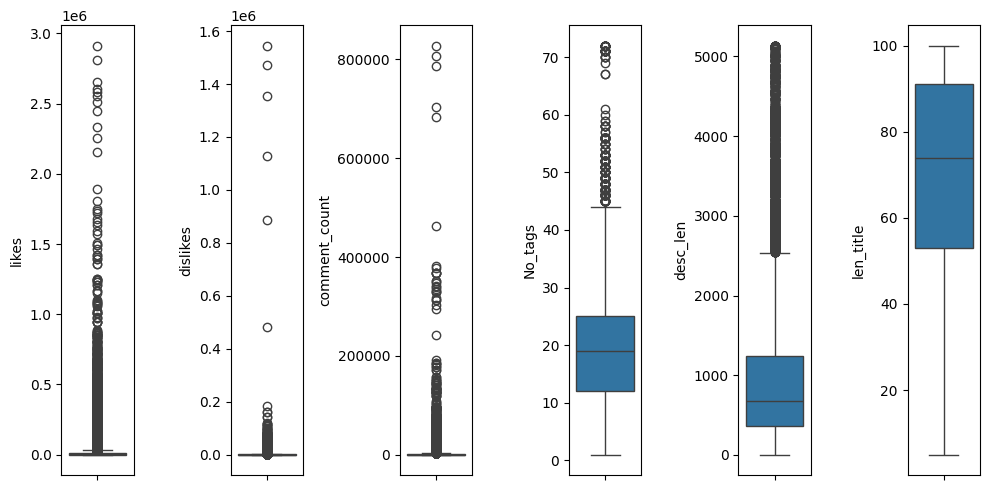

In [12]:
plt.figure(figsize=(10, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

##### Violinplot

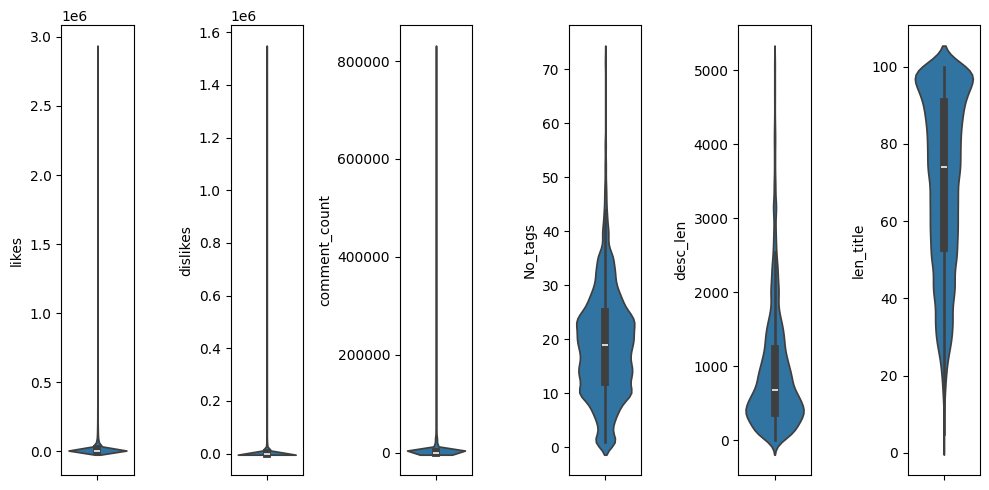

In [13]:
plt.figure(figsize=(10, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

##### Histogram Plot

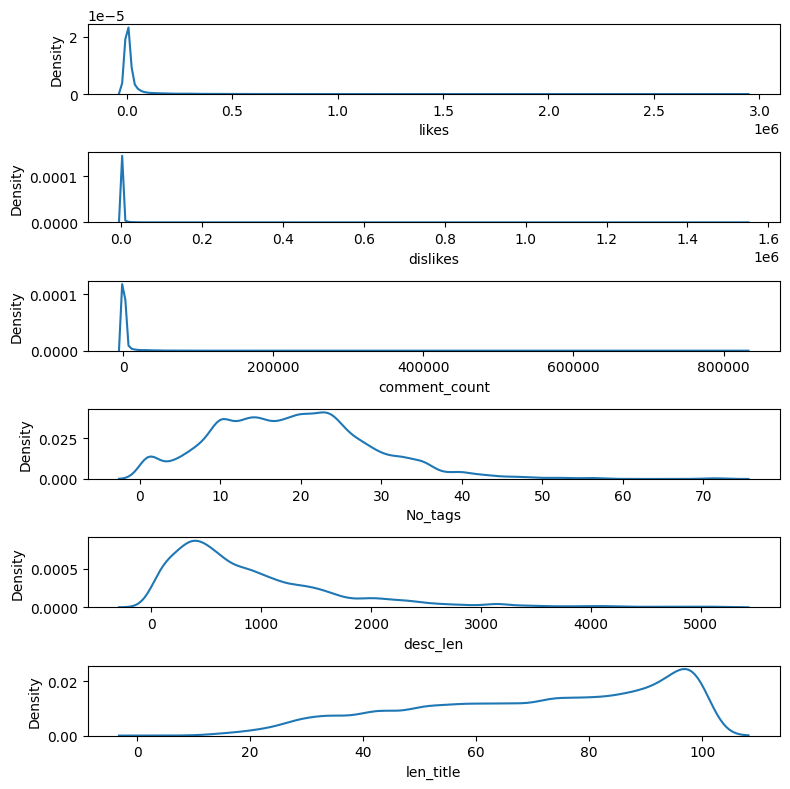

In [14]:
plt.figure(figsize=(8, 8))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 1, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

<details>
<summary>Penjelasan Distribusi</summary>

- A
- B
- C

</details>

#### Multivariate Analysis

In [17]:
nums = df.select_dtypes(include=['number']).columns
cats = df.select_dtypes(include=['object', 'category', 'bool']).columns

<Axes: >

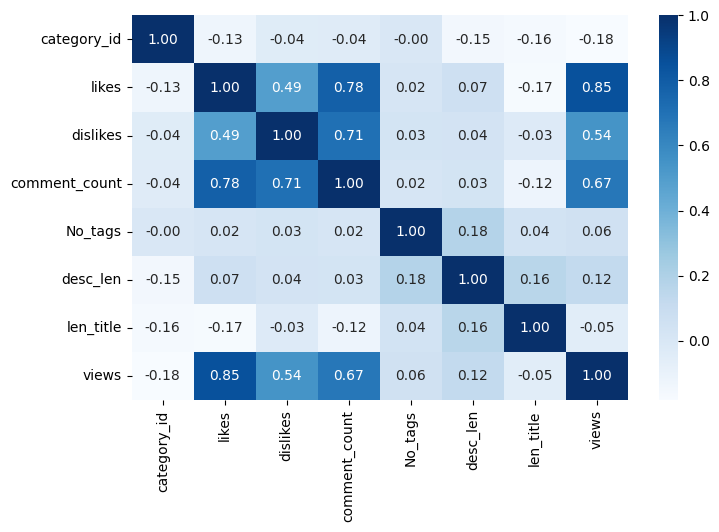

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Kolom no_tags dan len_title memiliki korelasi yang sangat kecil terhadap views, sehingga tidak akan memberikan pengaruh yang signifikan terhadap prediksi views. Maka dari itu no_tags dan len_title layak untuk di drop 

### Preprocessing

#### Dropping feature

Drop kolom yang tidak memiliki signifikansi yang tinggi terhadap label

In [ ]:
df = df.drop(columns=['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'No_tags', 'len_title'])

Kolom title, tag, dan description merupakan feature kalimat yang tidak dapat diproses oleh model. Maka dari itu untuk pemmbuatan model kali ini, kolom-kolom ini akan di drop 

In [ ]:
df = df.drop(columns=['title', 'tags', 'description'])

In [ ]:
df.head(3)

### Feature Engineering

#### Datetime Extraction

Kita dapat melakukan ekstraksi hari, bulan, dan tahun dari Date waktu trending dan waktu publish

In [ ]:
df['trending_day'] = df['trending_date'].dt.day
df['trending_month'] = df['trending_date'].dt.month
df['trending_year'] = df['trending_date'].dt.year

df['publish_day'] = df['publish_date'].dt.day
df['publish_month'] = df['publish_date'].dt.month
df['publish_year'] = df['publish_date'].dt.year

Selain itu pada publish hour, kita dapat melakukan ekstraksi terhadap waktu jamnya saja dengan kategori pagi atau malam hari. Hal ini dilakukan dengan asumsi perbedaan menit dan detik tidak terlalu signifikan

In [ ]:
def categorize_time(data):
    hour = data.hour
    if 6 <= hour < 18:
        # Pagi hari (06.00 - 17.59)
        return 0
    else:
        # Malam Hari (18.00 - 05.59)
        return 1

In [ ]:
df['time_publish_category'] = df['publish_time'].apply(categorize_time)

Setelah melakukan ekstraksi, kolom lama akan dihapus karena bertipe datetime dan sudah tidak dipakai lagi

In [ ]:
df = df.drop(columns=['trending_date', 'publish_time', 'publish_date'])

#### Ranking Channel Title

Channel title merupakan column kategorikal yang harus di preprocess untuk menjadi numerik agar bisa dimengerti oleh model. 

Terdapat 1390 jenis channel title sehingga one hot encodding tidak bisa dilakukan karena akan membuat dimensi fitur menjadi sangat besar. 

Oleh karena itu feature engineering akan dilakukan dengan menggunakan label encoding berdasarkan urutan rata-rata views tiap channel dari yang terbesar hingga terkecil. 

In [ ]:
df_channel = df.groupby('channel_title').agg({
    'views' : ['mean']
}).reset_index()

df_channel_sorted = df_channel.sort_values(by=('views', 'mean'), ascending=False)
df_channel_sorted = df_channel_sorted.reset_index(drop=True)

df_channel_sorted

In [ ]:
channel_label_dict = dict(zip(df_channel_sorted['channel_title'], df_channel_sorted.index + 1))

In [ ]:
df['channel_title'] = df['channel_title'].map(channel_label_dict)
df.head(3)

Channel title sudah bertipe numeric

#### Korelasi Hasil Feature Engineering

In [ ]:
df['views'] = df.pop('views')

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Ternyata hour, day, month, dan year tidak ada yang memiliki signifikan yang tinggi terhadap views. Maka dari itu kolom tersebut akan di drop agar dimensi tidak terlalu besar

In [ ]:
df = df.drop(columns=['trending_day', 'trending_month', 'trending_year', 'publish_day', 'publish_month', 'publish_year', 'time_publish_category'])

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat bahwa tiap kolumn memiliki korelasi dengan views, ada yang sangat tinggi dan ada yang rendah. Kolum-kolum ini akan dipakai untuk modeling

#### Scalling

Scalling akan dilakukan agar tidak ada feature yang lebih berpengaruh daripada yang lain

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values.reshape(-1, 1)  

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df = pd.DataFrame(data=np.hstack((features_scaled, labels)), columns=df.columns)

Berikut adalah hasil akhir dari feature engineering

In [ ]:
df.head()

In [ ]:
df.to_excel('../dataset/preprocessed.xlsx')

### Modeling